In [1]:
from rdkit import Chem
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [2]:
nitromethane = Chem.MolFromSmiles("C[N+](=O)[O-]")

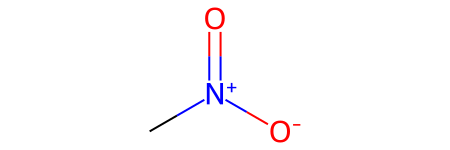

In [3]:
nitromethane

In [4]:
nitromethane = Chem.MolFromSmiles("CN(=O)->O")

As expected, there is no implicit H on the O atom:

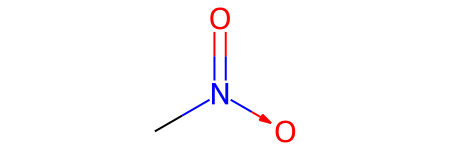

In [5]:
nitromethane

The attempt to generate the charge-separated analog with an implicit H on the oxygen fails, as expected:

In [6]:
nitromethane = Chem.MolFromSmiles("C[N+](=O)-[OH-]")

[19:45:26] Explicit valence for atom # 3 O, 2, is greater than permitted


In [7]:
mol = Chem.MolFromSmiles("N(C)(C)(C)(->O)->O", sanitize=False)

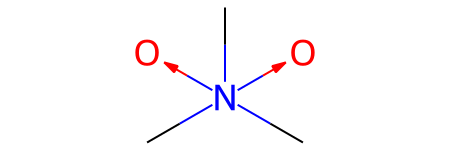

In [8]:
mol

The molecule has no implicit Hs on the oxygen, and raises an exception with `strict=True`, because a nitrogen atom does not have enough LP to establish two double bonds:

In [9]:
mol.UpdatePropertyCache(False)

In [10]:
mol.UpdatePropertyCache(True)

[19:45:27] The number of electrons donated by atom # 0 N, 4, is greater than permitted


AtomValenceException: The number of electrons donated by atom # 0 N, 4, is greater than permitted

In [11]:
Chem.MolToSmiles(mol)

'CN(C)(C)(->O)->O'

The charge-separated version of the above fails sanitization, as expected:

In [12]:
mol = Chem.MolFromSmiles("[N+2](C)(C)(C)(-[O-])-[O-]", sanitize=False)

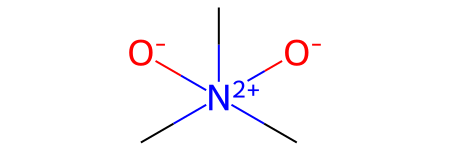

In [13]:
mol

In [14]:
mol.UpdatePropertyCache(False)

In [15]:
mol.UpdatePropertyCache(True)

[19:45:46] Explicit valence for atom # 0 N, 5, is greater than permitted


AtomValenceException: Explicit valence for atom # 0 N, 5, is greater than permitted

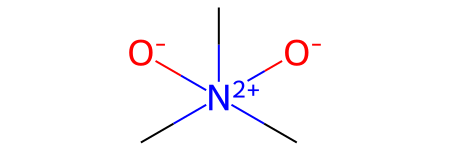

In [16]:
Chem.MolFromMolBlock((Chem.MolToV3KMolBlock(mol)), sanitize=False)

Also aromatic _N_-oxides correctly have no implicit Hs on oxygen:

In [17]:
pyridine_N_oxide = Chem.MolFromSmiles("c1ccccn1->O")

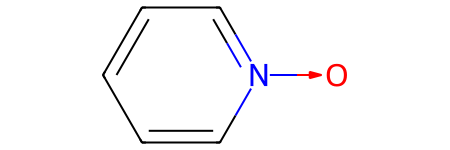

In [18]:
pyridine_N_oxide

The nitrogen analogue has a single implicit hydrogen, as expected:

In [19]:
mol = Chem.MolFromSmiles("N(C)(C)(C)->N")

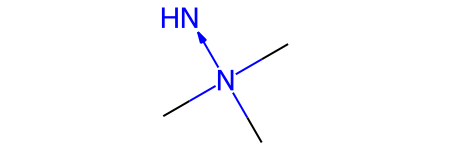

In [20]:
mol

Its charge separated version is correct:

In [21]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[NH-]")

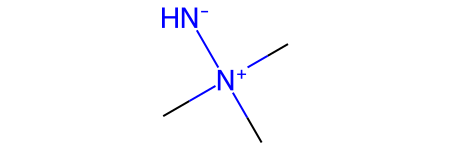

In [22]:
mol

And it correctly fails when trying to add another implicit H:

In [23]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[NH2-]")

[19:45:48] Explicit valence for atom # 4 N, 3, is greater than permitted


In [24]:
mol = Chem.MolFromSmiles("N(C)(C)(C)->O<-N(C)(C)C", False)

This molecule should raise an exception with `strict=True`, because oxygen cannot expand its octet, and it indeed does:

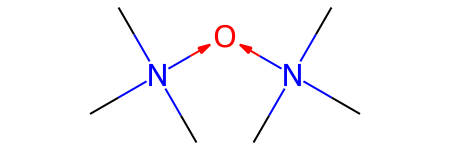

In [25]:
mol

In [26]:
Chem.SanitizeMol(mol)

[19:45:49] The number of electrons received by atom # 4 O, 4, is greater than permitted


AtomValenceException: The number of electrons received by atom # 4 O, 4, is greater than permitted

As expected, sanitization fail also when written with charge separation, since that implies again 10 electrons on oxygen:

In [27]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[O-2]-[N+](C)(C)C", False)

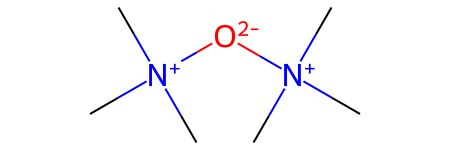

In [28]:
mol

In [29]:
Chem.SanitizeMol(mol)

[19:45:50] Explicit valence for atom # 4 O, 2, is greater than permitted


AtomValenceException: Explicit valence for atom # 4 O, 2, is greater than permitted

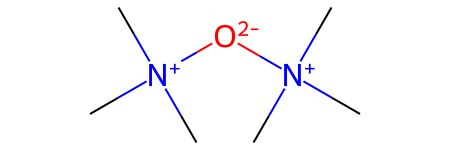

In [30]:
mol

It also correctly fails when written with a single charge, which implies 9 electrons on oxygen:

In [31]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[O-]-[N+](C)(C)C", False)

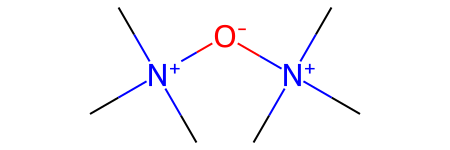

In [32]:
mol

In [33]:
Chem.SanitizeMol(mol)

[19:45:50] Explicit valence for atom # 4 O, 2, is greater than permitted


AtomValenceException: Explicit valence for atom # 4 O, 2, is greater than permitted

In [34]:
mol = Chem.MolFromSmiles("N(C)(C)(C)->S<-N(C)(C)C", False)

This molecule can expand its octet, so it should not raise an exception:

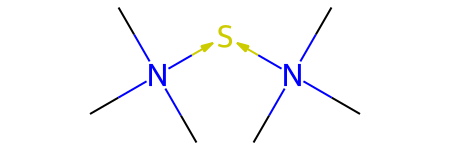

In [35]:
mol

In [36]:
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

Also the version written with charge separation should not cause any problems:

In [37]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[S-2]-[N+](C)(C)C", False)

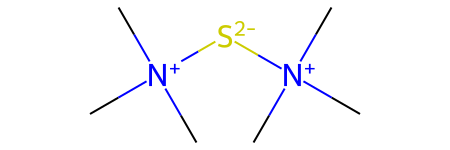

In [38]:
mol

In [39]:
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

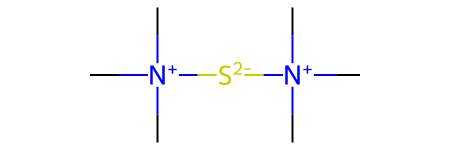

In [40]:
mol

Correctly, it does not cause problems also when written with a single negative charge:

In [41]:
mol = Chem.MolFromSmiles("[N+](C)(C)(C)-[S-]-[N+](C)(C)C", False)

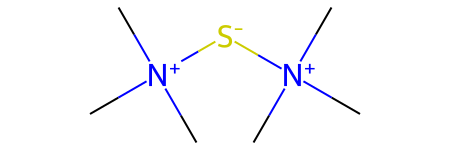

In [42]:
mol

In [43]:
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

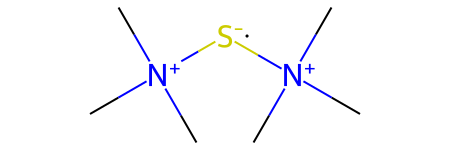

In [44]:
mol

This molecule can formally establish two dative bonds, and correctly it does not bear any implicit Hs on either nitrogen or oxygen:

In [45]:
mol = Chem.MolFromSmiles("CN(->O)->O")

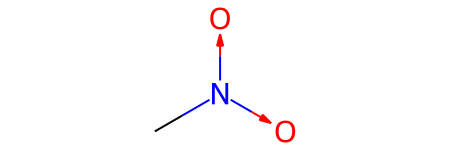

In [46]:
mol

In [47]:
Chem.MolToSmiles(mol)

'CN(->O)->O'

Its charge-separated version is indeed correct:

In [48]:
mol = Chem.MolFromSmiles("C[N+2](-[O-])-[O-]")

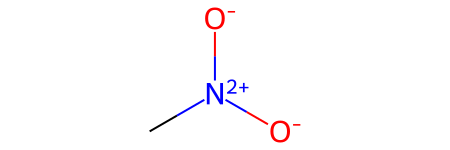

In [49]:
mol

And it correctly fails sanitization when attempting to add two hydrogens:

In [50]:
mol = Chem.MolFromSmiles("C[NH2+2](-[O-])-[O-]")

[19:45:54] Explicit valence for atom # 1 N, 5, is greater than permitted


Dimethylsulfone represented with dative bonds should not bear implicit Hs on the oxygen atoms, and indeed it does not:

In [51]:
mol = Chem.MolFromSmiles("CS(->O)(->O)C")

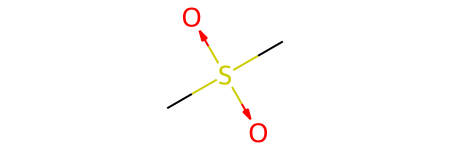

In [52]:
mol

In [53]:
nh3_bh3_charge_sep_from_smiles = Chem.MolFromSmiles("[BH3-]-[NH3+]")

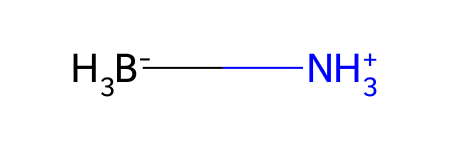

In [54]:
nh3_bh3_charge_sep_from_smiles

This is the same molecule represented with a dative bond rather than with charge separation, and boron has 3 implicit hydrogens as expected:

In [55]:
nh3_bh3_dative_from_smiles = Chem.MolFromSmiles("B<-N")

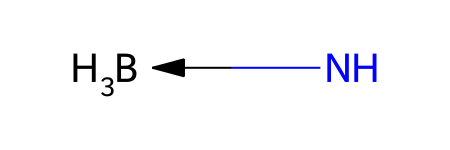

In [56]:
nh3_bh3_dative_from_smiles

In [57]:
nh3_bh3_dative_from_molblock = Chem.MolFromMolBlock("""
  Mrv1902 08122409262D          

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 2 1 0 0 0
M  V30 BEGIN ATOM
M  V30 1 B -1.3333 1.2917 0 0
M  V30 2 N 0.5833 1.2917 0 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 9 2 1
M  V30 END BOND
M  V30 END CTAB
M  END
""")

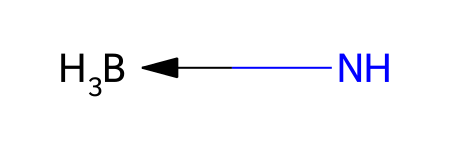

In [58]:
nh3_bh3_dative_from_molblock

This is an example from https://github.com/rdkit/rdkit/issues/3359

I can generate boron trifluoride diethyl etherate with charge separation...

In [59]:
mol = Chem.MolFromSmiles("F[B-](F)(F)-[O+](CC)CC")

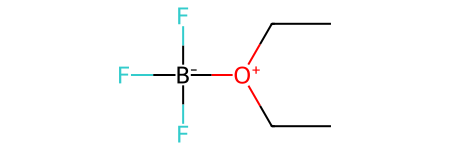

In [60]:
mol

...and the attempt to generate it with a dative bond does not fail sanitization, as expected:

In [61]:
mol = Chem.MolFromSmiles("FB(F)(F)<-O(CC)CC", sanitize=False)

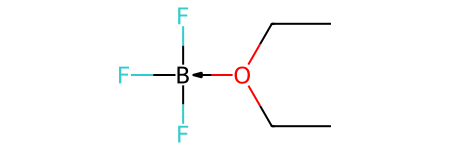

In [62]:
mol

In [63]:
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

Similarly, I can generate the isoelectronic species with carbon using charge separation...

In [64]:
mol = Chem.MolFromSmiles("FC(F)(F)-[O+](CC)CC")

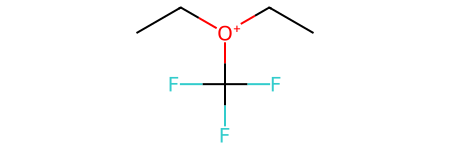

In [65]:
mol

...and the attempt to sanitize it with a dative bond does not fail, as expected:

In [66]:
mol = Chem.MolFromSmiles('F[C+](F)(F)<-O(C)C', sanitize=False)

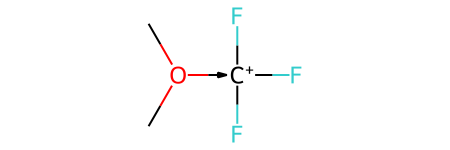

In [67]:
mol

In [68]:
Chem.SanitizeMol(mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

ChemDraw is almost always right when flagging or not flagging chemical mistakes on dative bonds; it only fails with the double dative bond to sulfur (which is a very much forged case, to be honest):

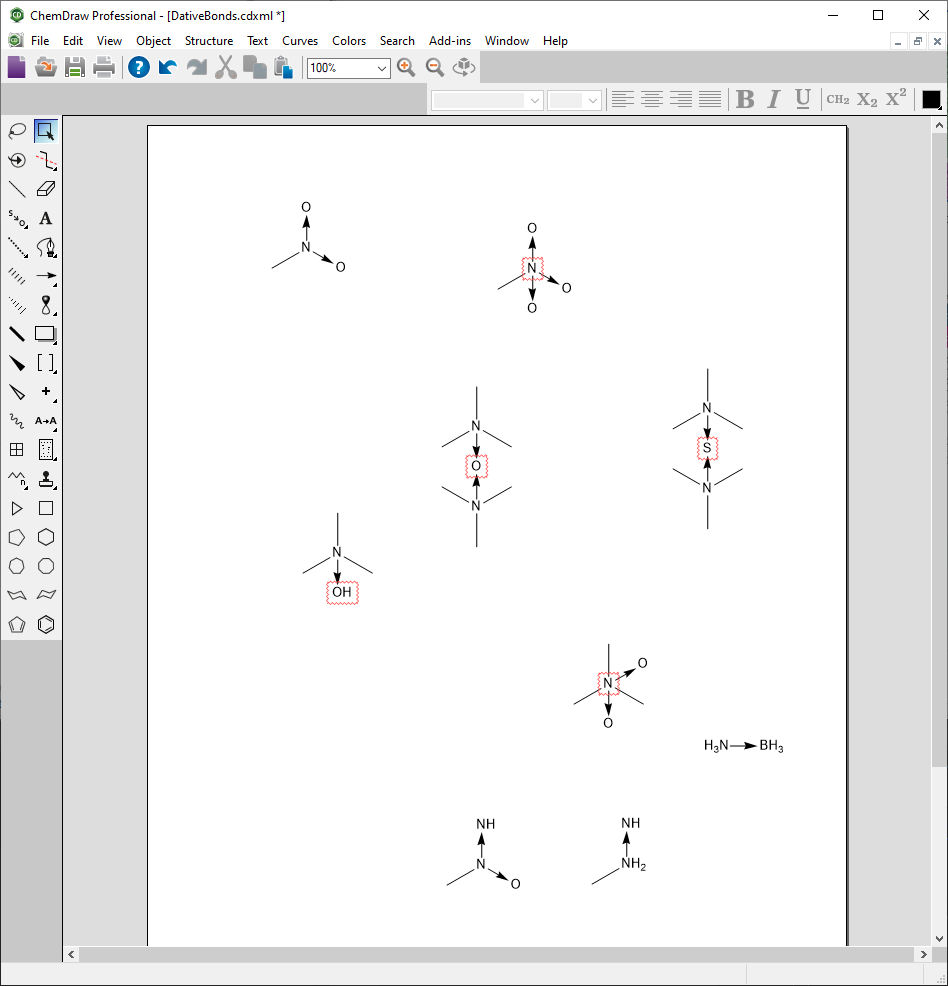

In [69]:
smilesps = Chem.SmilesParserParams()
smilesps.removeHs = False
mol = Chem.MolFromSmiles("[H-].[OH+]", smilesps)

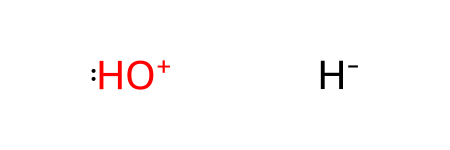

In [70]:
mol

In [71]:
mol = Chem.MolFromSmiles("[H-].[OH+]")

[19:45:59] WARNING: not removing hydrogen atom without neighbors


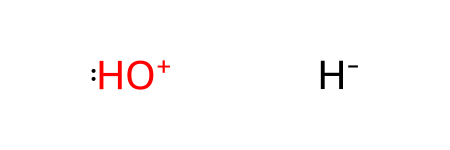

In [72]:
mol

In [73]:
mol = Chem.MolFromSmiles("[H-]->[OH+]", smilesps)

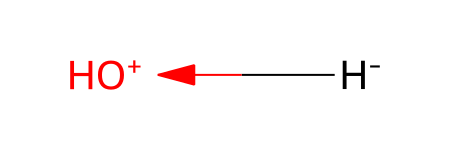

In [74]:
mol

In [75]:
mol.GetAtomWithIdx(1).GetNumRadicalElectrons()

0

In [76]:
ps = Chem.RemoveHsParameters()

In [77]:
ps.removeHydrides = True

In [78]:
mol_no_h = Chem.RemoveHs(mol, ps)

In [79]:
mol_no_h.GetNumAtoms()

1

In [80]:
Chem.GetFormalCharge(mol_no_h)

1

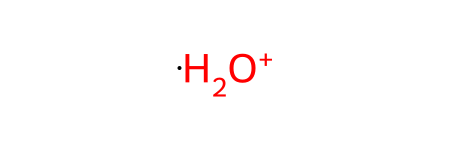

In [81]:
mol_no_h

In [82]:
mol_no_h.GetAtomWithIdx(0).GetNumRadicalElectrons()

1

In [83]:
mol = Chem.MolFromSmiles("[Fe+2]<-[H-]", smilesps)

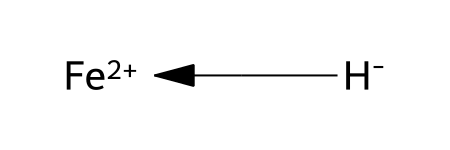

In [84]:
mol

In [85]:
ps.removeHydrides = True

In [86]:
mol_no_h = Chem.RemoveHs(mol, ps)

In [87]:
Chem.GetFormalCharge(mol_no_h)

2

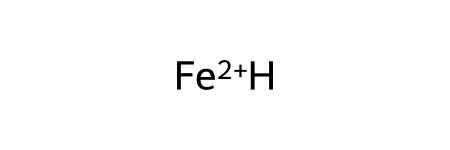

In [88]:
mol_no_h

In [89]:
smilesps = Chem.SmilesParserParams()
smilesps.sanitize = False
mol = Chem.MolFromSmiles("[H-][OH+]", smilesps)

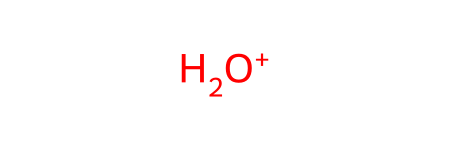

In [90]:
mol

In [91]:
mol = Chem.MolFromSmiles("[2HH2-]", smilesps)

[19:46:02] WARNING: not removing hydrogen atom without neighbors


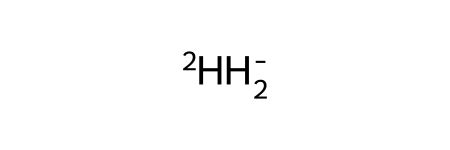

In [92]:
mol

In [93]:
Chem.MolToSmiles(mol)

'[2HH2-]'

In [94]:
mb = """
     RDKit          2D

  0  0  0  0  0  0  0  0  0  0999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 7 7 0 0 0
M  V30 BEGIN ATOM
M  V30 1 O -0.000000 5.505314 0.000000 0
M  V30 2 N -0.000000 4.008578 0.000000 0 CHG=2
M  V30 3 C 0.000000 0.999538 0.000000 0
M  V30 4 C -1.298419 3.248684 0.000000 0
M  V30 5 C 1.298419 3.248684 0.000000 0
M  V30 6 C -1.298419 1.744164 0.000000 0
M  V30 7 C 1.298419 1.744164 0.000000 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 1 2
M  V30 2 1 2 4
M  V30 3 1 2 5
M  V30 4 1 3 6
M  V30 5 1 3 7
M  V30 6 1 4 6
M  V30 7 1 5 7
M  V30 END BOND
M  V30 END CTAB
M  END
$$$$
"""
m = Chem.MolFromMolBlock(mb)

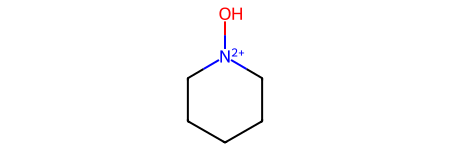

In [95]:
m

In [96]:
m.Debug()

# The +2 charge on the N atom is completely bogus:
# Atoms:
#      0 8 O chg: 0  deg: 1 exp: 1 imp: 1 hyb: SP3
#      1 7 N chg: 2  deg: 3 exp: 3 imp: 0 hyb: SP2
#      2 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
#      3 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
#      4 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
#      5 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
#      6 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
# Bonds:
#      0 0->1 order: 1
#      1 1->3 order: 1
#      2 1->4 order: 1
#      3 2->5 order: 1
#      4 2->6 order: 1
#      5 3->5 order: 1
#      6 4->6 order: 1

Atoms:
	0 8 O chg: 0  deg: 1 exp: 1 imp: 1 hyb: SP3
	1 7 N chg: 2  deg: 3 exp: 3 imp: 0 hyb: SP2
	2 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
	3 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
	4 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
	5 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
	6 6 C chg: 0  deg: 2 exp: 2 imp: 2 hyb: SP3
Bonds:
	0 0->1 order: 1
	1 1->3 order: 1
	2 1->4 order: 1
	3 2->5 order: 1
	4 2->6 order: 1
	5 3->5 order: 1
	6 4->6 order: 1


[19:46:04] Running Uncharger


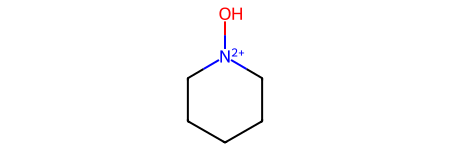

In [97]:
uncharger = rdMolStandardize.Uncharger(canonicalOrder=True)
uncharger.uncharge(m)

In [98]:
mol = Chem.MolFromSmiles("[Cu+]->N")

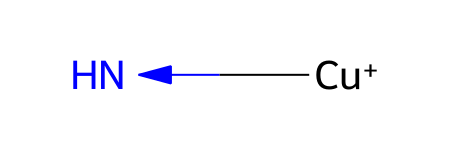

In [99]:
mol

In [100]:
mol.GetAtomWithIdx(1).GetTotalValence()

1

In [101]:
Chem.MolToSmiles(mol)

'[NH]<-[Cu+]'

In [102]:
mol = Chem.MolFromSmiles("[Cu+]->B")

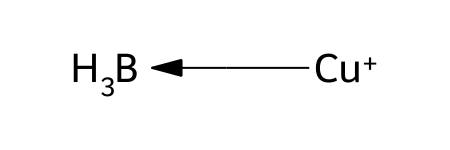

In [103]:
mol

In [104]:
mol.GetAtomWithIdx(1).GetTotalValence()

3

In [105]:
Chem.MolToSmiles(mol)

'B<-[Cu+]'

In [106]:
mol = Chem.MolFromSmiles("CN(->[Li+])C")

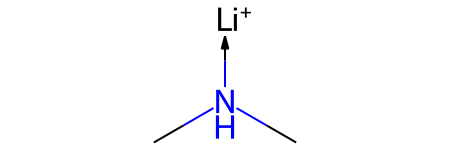

In [107]:
mol

In [108]:
mb = """
  SMMXDraw08051113052D

  0  0  0     0  0            999 V3000
M  V30 BEGIN CTAB
M  V30 COUNTS 8 8 0 0 0
M  V30 BEGIN ATOM
M  V30 1 Cl 11.5252 -12.6451 0.0000 0
M  V30 2 Al 12.7063 -12.6451 0.0000 0
M  V30 3 Cl 12.7063 -11.4640 0.0000 0
M  V30 4 Cl 12.7063 -13.8979 0.0000 0
M  V30 5 Al 14.7407 -13.8979 0.0000 0
M  V30 6 Cl 14.7407 -12.6451 0.0000 0
M  V30 7 Cl 15.9218 -13.8979 0.0000 0
M  V30 8 Cl 14.7407 -15.0790 0.0000 0
M  V30 END ATOM
M  V30 BEGIN BOND
M  V30 1 1 2 3 
M  V30 2 1 5 6 
M  V30 3 1 1 2 
M  V30 4 1 5 7 
M  V30 5 1 2 4 
M  V30 6 1 5 8 
M  V30 7 9 6 2 
M  V30 8 9 4 5 
M  V30 END BOND
M  V30 END CTAB
M  END
"""

In [109]:
m = Chem.MolFromMolBlock(mb, sanitize=False)

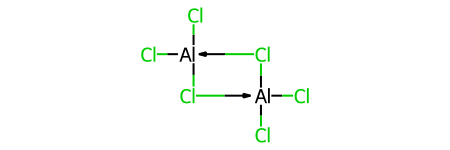

In [110]:
m

In [111]:
Chem.MolToSmiles(m)

'Cl[Al]1(Cl)<-Cl[Al](Cl)(Cl)<-Cl1'

In [112]:
m = Chem.MolFromSmiles("Cl[Al]1(Cl)<-Cl[Al](Cl)(Cl)<-Cl1")

In [113]:
m = Chem.MolFromSmiles("Cl[Al]1(Cl)<-Cl[Al](Cl)(Cl)<-Cl1")

In [114]:
m = Chem.MolFromSmiles("CCO(CC)->B")

In [115]:
mol = Chem.MolFromSmiles("N->B")

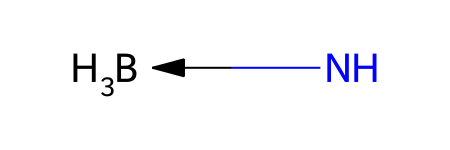

In [116]:
mol

In [117]:
mol.Debug()

Atoms:
	0 7 N chg: 0  deg: 1 exp: 0 imp: 1 hyb: SP2
	1 5 B chg: 0  deg: 1 exp: 0 imp: 3 hyb: SP3
Bonds:
	0 0->1 order: D


In [118]:
mol = Chem.MolFromSmiles("N->O")

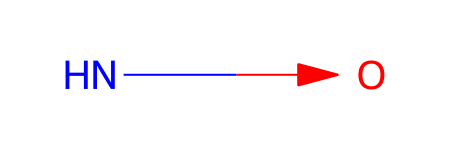

In [119]:
mol

In [120]:
mol.Debug()

Atoms:
	0 7 N chg: 0  deg: 1 exp: 0 imp: 1 hyb: SP2
	1 8 O chg: 0  deg: 1 exp: 0 imp: 0 hyb: SP3
Bonds:
	0 0->1 order: D


In [121]:
mol = Chem.MolFromSmiles("CS(=O)(=O)C")

In [122]:
mol.Debug()

Atoms:
	0 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: SP3
	1 16 S chg: 0  deg: 4 exp: 6 imp: 0 hyb: SP3
	2 8 O chg: 0  deg: 1 exp: 2 imp: 0 hyb: SP2
	3 8 O chg: 0  deg: 1 exp: 2 imp: 0 hyb: SP2
	4 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: SP3
Bonds:
	0 0->1 order: 1
	1 1->2 order: 2
	2 1->3 order: 2
	3 1->4 order: 1


In [123]:
mol = Chem.MolFromSmiles("CS(->O)(->O)C")

In [124]:
mol.Debug()

Atoms:
	0 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: SP3
	1 16 S chg: 0  deg: 4 exp: 2 imp: 0 hyb: SP3
	2 8 O chg: 0  deg: 1 exp: 0 imp: 0 hyb: SP3
	3 8 O chg: 0  deg: 1 exp: 0 imp: 0 hyb: SP3
	4 6 C chg: 0  deg: 1 exp: 1 imp: 3 hyb: SP3
Bonds:
	0 0->1 order: 1
	1 1->2 order: D
	2 1->3 order: D
	3 1->4 order: 1


In [126]:
m = Chem.RWMol()
m.AddAtom(Chem.Atom(5))
m.AddAtom(Chem.Atom(6))
m.AddAtom(Chem.Atom(6))
m.AddAtom(Chem.Atom(6))
m.AddAtom(Chem.Atom(6))
m.AddBond(0, 1, Chem.BondType.SINGLE)
m.AddBond(0, 2, Chem.BondType.SINGLE)
m.AddBond(0, 3, Chem.BondType.SINGLE)
m.AddBond(0, 4, Chem.BondType.SINGLE)
m.GetAtomWithIdx(0).SetFormalCharge(+1)

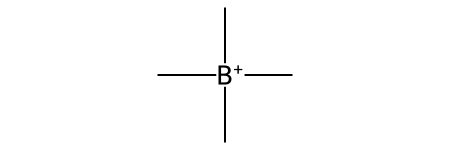

In [127]:
m

In [128]:
Chem.SanitizeMol(m)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

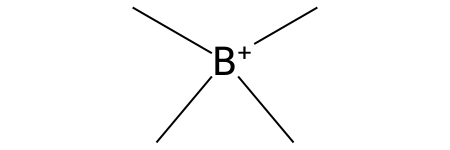

In [129]:
m

In [130]:
m = Chem.MolFromSmiles("C[B+](C)(C)C")

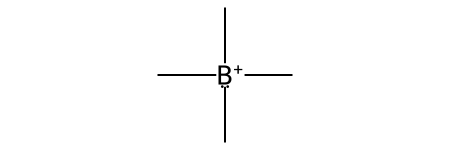

In [131]:
m